# Zadanie 1

Secret message:  AAAAAAAAAAAAAAAAAOEAAAAOAAEEE


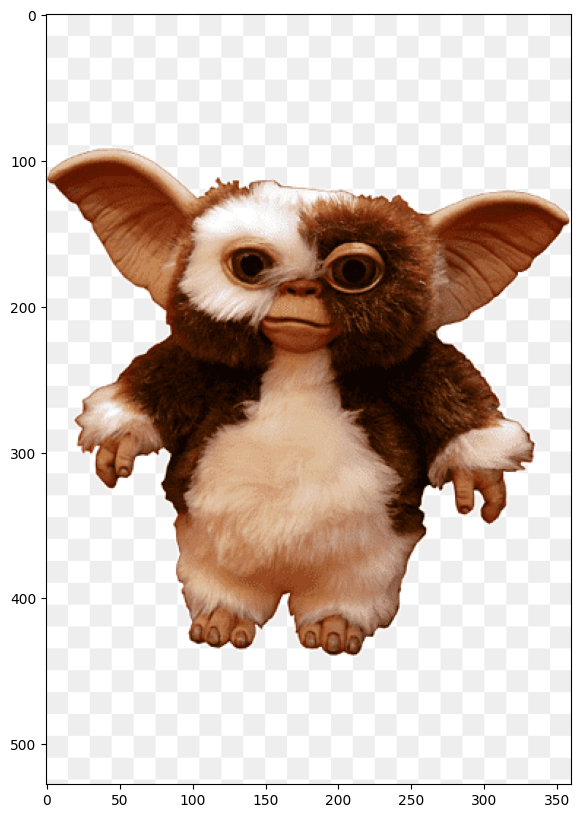

In [51]:
original_image = load_image("images/gremlin.png")
message = "AAAAAAAAAAAAAAAAAOEAAAAOAAEEE" * 1
n = 1  # liczba najmłodszych bitów używanych do ukrycia wiadomości

message = encode_as_binary_array(message)  # Zakodowanie wiadomości jako ciąg 0 i 1
image_with_message = hide_message(original_image, message, n)  # Ukrycie wiadomości w obrazku

save_image("images/gremlin_with_message.png", image_with_message)  # Zapisanie obrazka w formacie PNG

image_with_message_png = load_image("images/gremlin_with_message.png")  # Wczytanie obrazka PNG

secret_message_png = decode_from_binary_array(
    reveal_message(image_with_message_png, nbits=n, length=len(message)))  # Odczytanie ukrytej wiadomości z PNG

print("Secret message: ", secret_message_png)



plt.imshow(image_with_message_png)

# Zadanie 2

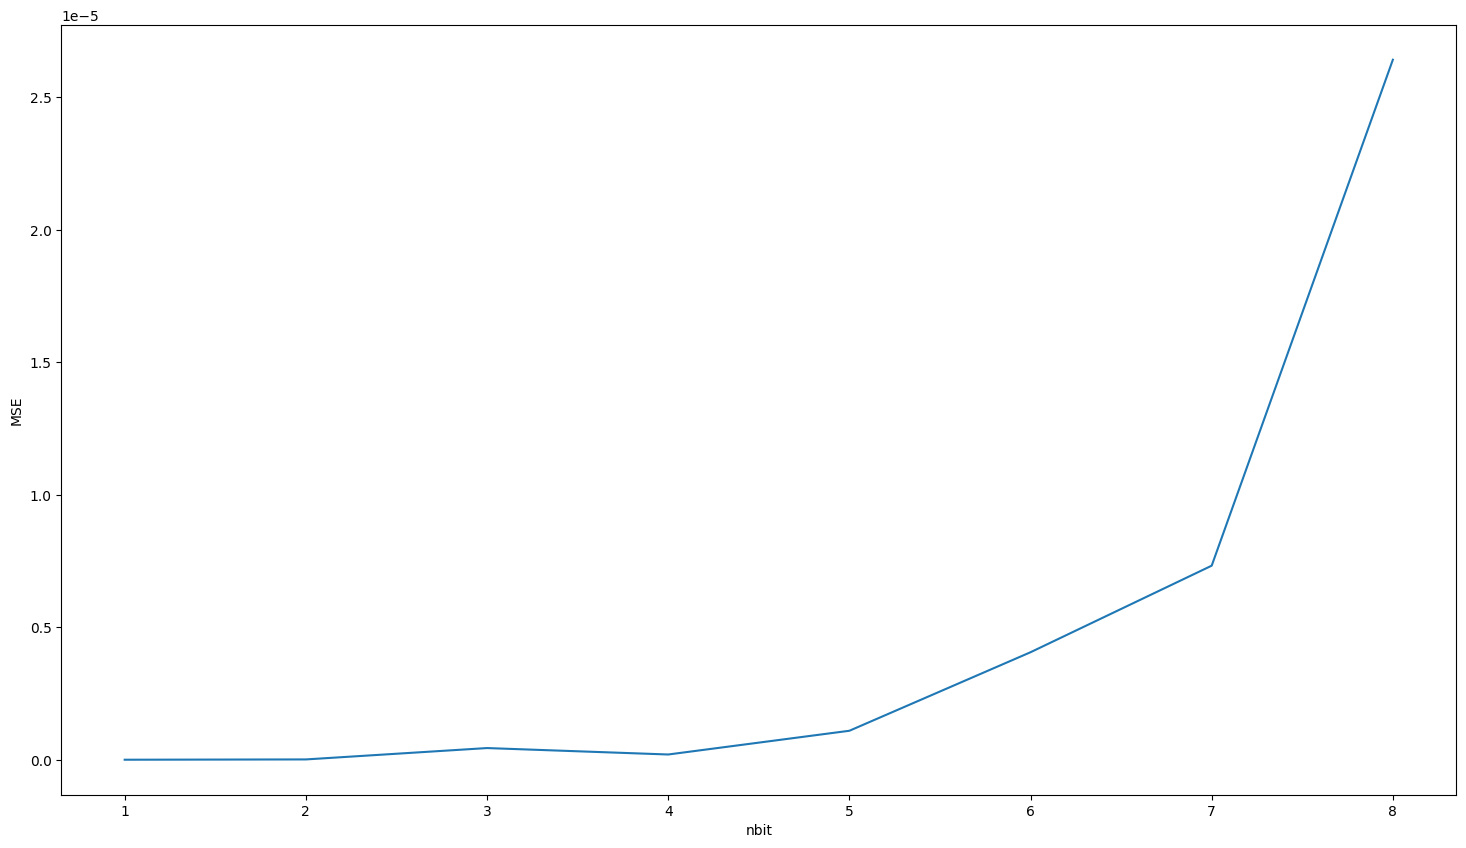

In [52]:
message = "AAAAAAAAAUEEAAAAAAAOOOAAEEEE"

orginal_images = [load_image("images/gremlin.png") for i in range (8)]


message = encode_as_binary_array(message)

images_with_messages = [hide_message(orginal_images[n], message, n+1) for n in range(8)]

MSE = np.zeros(8)

x_image = len(orginal_images[0])
y_image = len(orginal_images[0][0])

n = x_image * y_image

m = 3
for image in range(8):
    for i in range(m):
        for x in range(x_image):
            for y in range(y_image):
                MSE[image] += (np.float32(orginal_images[image][x][y][i])/255 - np.float32(images_with_messages[image][x][y][i])/255)**2
    MSE[image] /= (n * m)


x = [i for i in range(1,9)]
plt.plot(x, MSE)
plt.xlabel("nbit")
plt.ylabel("MSE")
plt.show()


# Zadanie 3

Secret message:  AAAAAAAAAAAAAAAAAOEAAAAOAAEEE


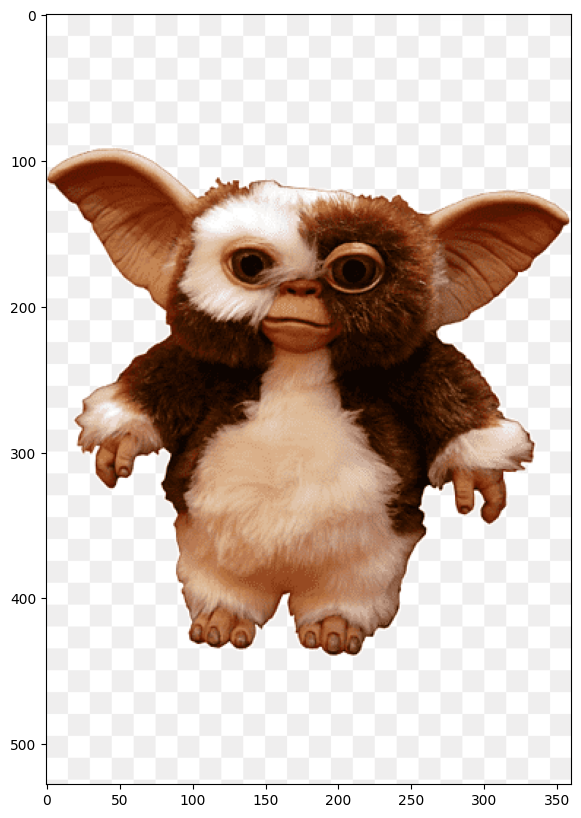

In [53]:
def hide_message(image, message, nbits=1, spos=0):
    """Hide a message in an image (LSB).
    
    nbits: number of least significant bits
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    if len(message) > (len(image) - spos) * nbits:
        raise ValueError("Message is to long :(")
    
    #Split message into chungs  of nbits length
    chunks = [message[i:i + nbits] for i in range(0, len(message), nbits)]
    #Iterate through chunks
    for i, chunk in enumerate(chunks):
        #Add offset
        index = spos + i
        byte = "{:08b}".format(image[index])
        new_byte = byte[:-nbits] + chunk
        image[index] = int(new_byte, 2)
        
    return image.reshape(shape)


def reveal_message(image, nbits=1, length=0, spos=0):
    """Reveal the hidden message.
    
    nbits: number of least significant bits
    length: length of the message in bits.
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    length_in_pixels = math.ceil(length/nbits)
    #Checks if theres enough pixels to decode message of the given length
    #If not adjust to maximum avilable
    if len(image) < (spos +length_in_pixels) or length_in_pixels <= 0:
        length_in_pixels = len(image) - spos
    
    message = ""
    i = spos
    while i < spos + length_in_pixels:
        byte = "{:08b}".format(image[i])
        message += byte[-nbits:]
        i += 1
        
    mod = length % -nbits
    if mod != 0:
        message = message[:mod]
    return message

original_image = load_image("images/gremlin.png")
message = "AAAAAAAAAAAAAAAAAOEAAAAOAAEEE" * 1
n = 1  # liczba najmłodszych bitów używanych do ukrycia wiadomości
spos = 4000


message = encode_as_binary_array(message)  # Zakodowanie wiadomości jako ciąg 0 i 1
image_with_message = hide_message(original_image, message, n, spos)  # Ukrycie wiadomości w obrazku

save_image("images/gremlin_with_message.png", image_with_message)  # Zapisanie obrazka w formacie PNG

image_with_message_png = load_image("images/gremlin_with_message.png")  # Wczytanie obrazka PNG

secret_message_png = decode_from_binary_array(
    reveal_message(image_with_message_png, nbits=n, length=len(message), spos=spos))  # Odczytanie ukrytej wiadomości z PNG

print("Secret message: ", secret_message_png)



plt.imshow(image_with_message_png)

# Zadanie 4

Text(0.5, 1.0, 'Secret image')

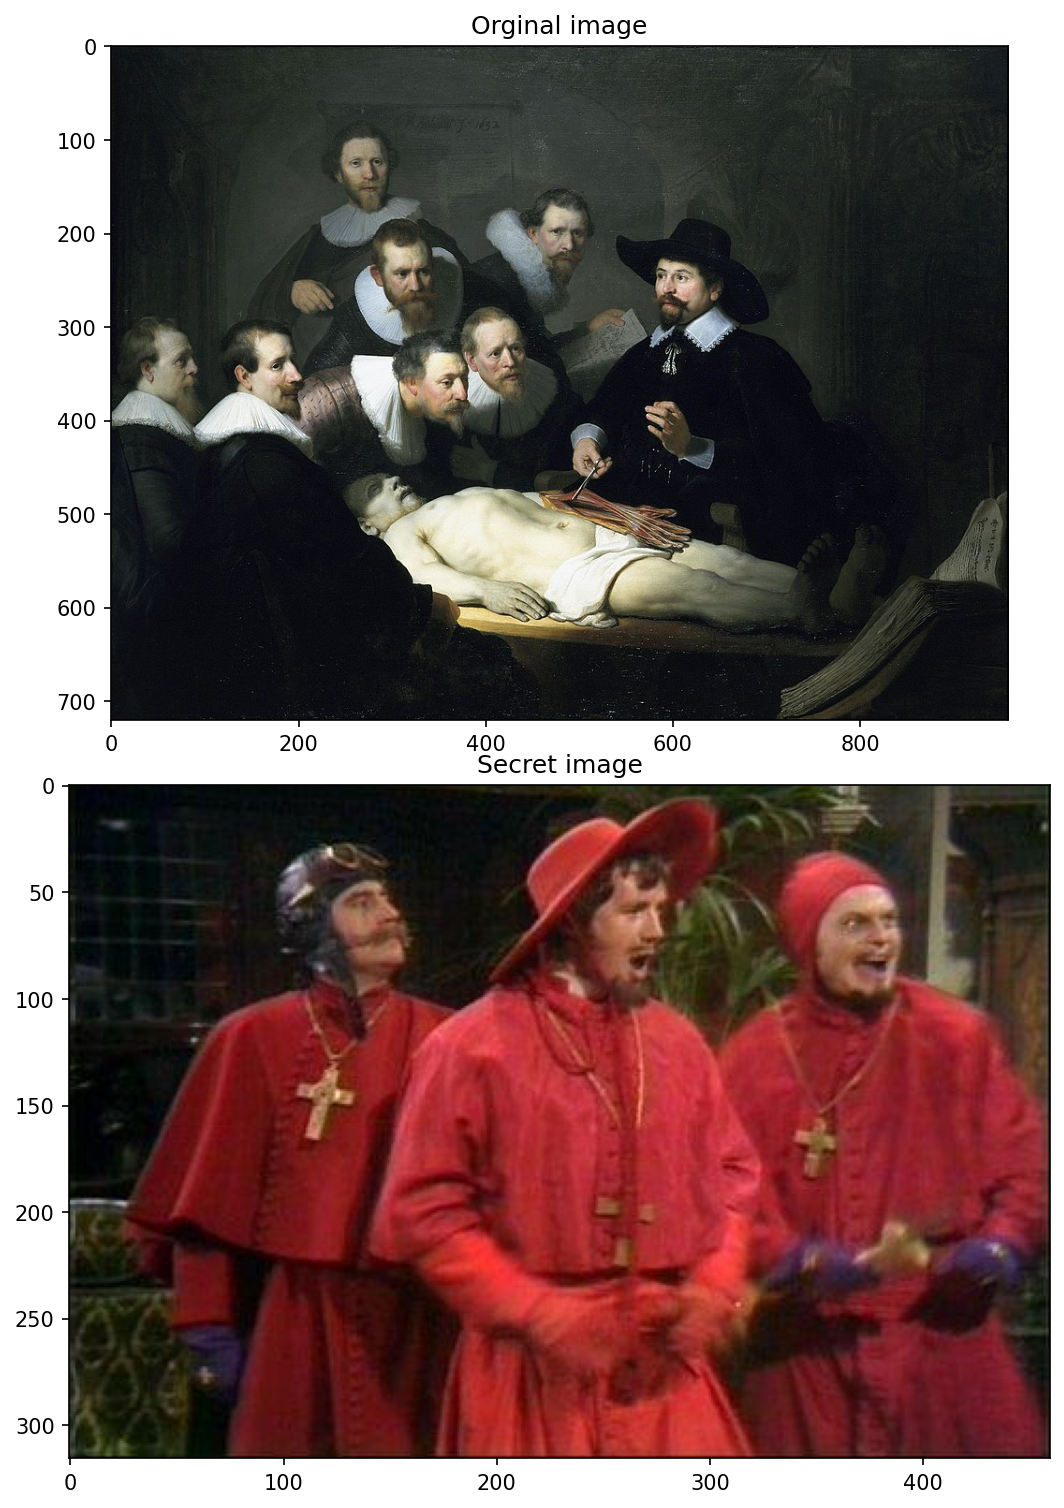

In [58]:
def hide_image(image, secret_image_path, nbits=1):
    with open(secret_image_path, "rb") as file:
        secret_img = file.read()
        
    secret_img = secret_img.hex()
    secret_img = [secret_img[i:i + 2] for i in range(0, len(secret_img), 2)]
    secret_img = ["{:08b}".format(int(el, base=16)) for el in secret_img]
    secret_img = "".join(secret_img)
    return hide_message(image, secret_img, nbits), len(secret_img)

import binascii
def reveal_image(image, nbits, length):
    #Read the hidden message
    secret_img = reveal_message(image, nbits, length)
    #Divide bits into bytes
    secret_img_bytes = [secret_img[i:i + 8] for i in range (0, len(secret_img), 8)]
    #Convert bytes into hex
    secret_img_hex = [hex(int(byte,2))[2:].zfill(2) for byte in secret_img_bytes]
    #Convert to string and then to bytes data
    secret_img_data = bytes.fromhex("".join(secret_img_hex))
    #Convert into numpy array
    return secret_img_data



image = load_image("images/rembrandt.png")
image_with_secret, length_of_secret = hide_image(image, "images/spanish.jpg", 1)

secret_image = reveal_image(image_with_secret, nbits = 1, length = length_of_secret) 
with open("images/hidden.png", "wb") as file:
    file.write(secret_image)

decoded_img = load_image("images/hidden.png")

f, ar = plt.subplots(2, dpi=150)
f.tight_layout()
ar[0].imshow(image_with_secret)
ar[0].set_title("Orginal image")
ar[1].imshow(decoded_img)
ar[1].set_title("Secret image")


# Zadanie 5

In [ ]:
#
# tu umieść kod
#